### Percobaan Dengan Semua Feature Di Normalisasi dengan MinMaxScaler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 
  
# metadata 
print(dry_bean_dataset.metadata) 
  
# variable information 
print(dry_bean_dataset.variables) 

{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [3]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [20]:
X.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [4]:
# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Mengaplikasikan scaler pada DataFrame X
X_scaled = scaler.fit_transform(X)

# Konversi hasil scaling menjadi DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [5]:
X_scaled_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342


In [6]:
y

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [7]:
y.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [8]:
class_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA': 5,
    'DERMASON': 6
}
y.loc[:,'Class'] = y['Class'].map(class_mapping)
y = y['Class'].values.ravel()
y = y.astype(int)
y

array([0, 0, 0, ..., 6, 6, 6])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,y,train_size=0.8,random_state=42)

In [10]:
estimator = RandomForestClassifier(max_depth=6, random_state=0)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=16,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X_train, y_train)
print('Features:', X.columns[model.support_])

Features: Index(['Perimeter', 'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1',
       'ShapeFactor4'],
      dtype='object')


In [13]:
X_train_selected = X_train[X_train.columns[model.support_]]
X_test_selected = X_test[X_test.columns[model.support_]]

modelku = RandomForestClassifier(max_depth=6, random_state=0)
modelku.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [15]:
y_pred = modelku.predict(X_test_selected)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.922879177377892


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       413
           1       0.93      0.89      0.91       261
           2       1.00      1.00      1.00       117
           3       0.92      0.94      0.93       317
           4       0.98      0.95      0.96       408
           5       0.85      0.89      0.87       536
           6       0.91      0.92      0.91       671

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



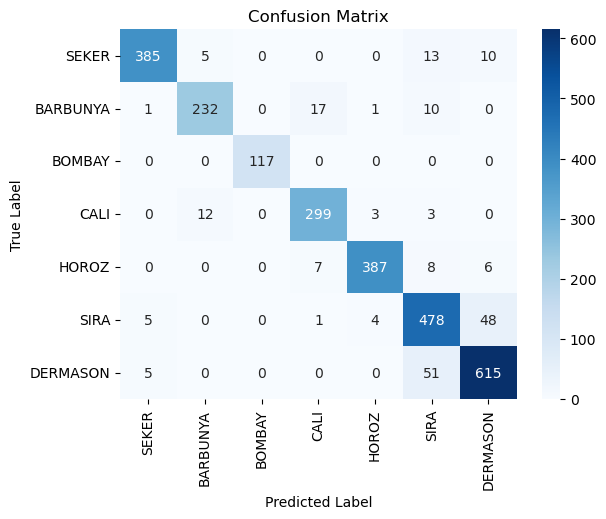

In [43]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Tampilkan confusion matrix dengan heatmap menggunakan seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'], yticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Percobaan Dengan Sebagian Feature Di Normalisasi dengan MinMaxScaler

In [23]:
mmscalar_Area = MinMaxScaler()
X.loc[:,'Area'] = mmscalar_Area.fit_transform(X[['Area']])

In [24]:
mmscalar_Perimeter = MinMaxScaler()
X.loc[:,'Perimeter'] = mmscalar_Perimeter.fit_transform(X[['Perimeter']])

In [25]:
mmscalar_MinorAxisLength = MinMaxScaler()
X.loc[:,'MinorAxisLength'] = mmscalar_MinorAxisLength.fit_transform(X[['MinorAxisLength']])

In [26]:
mmscalar_AspectRatio = MinMaxScaler()
X.loc[:,'AspectRatio'] = mmscalar_AspectRatio.fit_transform(X[['AspectRatio']])

In [27]:
mmscalar_ConvexArea = MinMaxScaler()
X.loc[:,'ConvexArea'] = mmscalar_ConvexArea.fit_transform(X[['ConvexArea']])

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,train_size=0.8,random_state=42)

In [29]:
estimator2 = RandomForestClassifier(max_depth=6, random_state=0)
model2 = GeneticSelectionCV(
    estimator2, cv=5, verbose=0,
    scoring="accuracy", max_features=16,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model2 = model2.fit(X_train2, y_train2)
print('Features:', X.columns[model2.support_])

Features: Index(['Perimeter', 'MinorAxisLength', 'Extent', 'Solidity', 'Roundness',
       'Compactness', 'ShapeFactor4'],
      dtype='object')


In [30]:
X_train_selected2 = X_train2[X_train2.columns[model2.support_]]
X_test_selected2 = X_test2[X_test2.columns[model2.support_]]

modelku2 = RandomForestClassifier(max_depth=6, random_state=0)
modelku2.fit(X_train_selected2, y_train2)

RandomForestClassifier(max_depth=6, random_state=0)

In [31]:
y_pred2 = modelku2.predict(X_test_selected2)

In [32]:
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Akurasi: {accuracy2}')

Akurasi: 0.9225119353654058


In [33]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       413
           1       0.94      0.89      0.91       261
           2       1.00      1.00      1.00       117
           3       0.91      0.94      0.93       317
           4       0.98      0.94      0.96       408
           5       0.85      0.89      0.87       536
           6       0.90      0.92      0.91       671

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



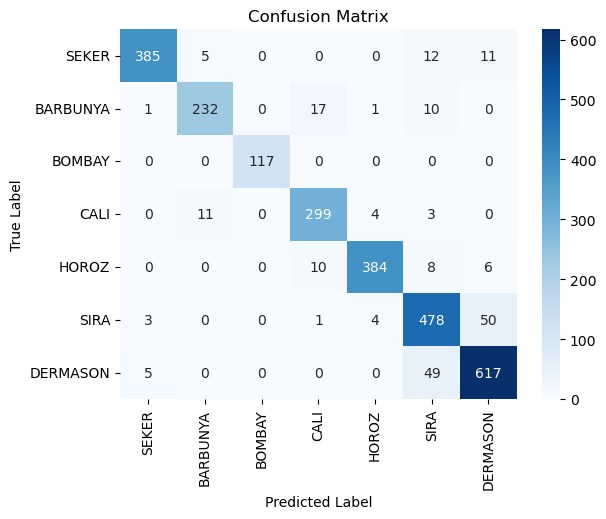

In [44]:
# Hitung confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
# Tampilkan confusion matrix dengan heatmap menggunakan seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'], yticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Kesimpulan
Akurasi dengan semua feature di normalisasi lebih baik daripada melakukan normalisasi pada feature yang range datanya tidak dalam range 0-1 contohnya feature (Area,Perimeter,MinorAxisLength, AspectRatio, dan ConvexArea) Walaupun tidak terlalu signifikan perbedaannya dimana perbedaannya sebesar 0.00036724201248627963%